In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
use_cols = ['revenue', 'reach', 'local_tv', 'online', 'instore', 'person', 'event']
df = pd.read_csv('D:/DataSets/P&G_Store_Data/Store.csv', usecols = use_cols)
df.head()

,revenue,reach,local_tv,online,instore,person,event
0,45860.28,2,31694.91,2115,3296,8,non_event
1,63588.23,2,35040.17,1826,2501,14,special
2,23272.69,4,30992.82,1851,2524,6,special
3,45911.23,2,29417.78,2437,3049,12,special
4,36644.23,2,35611.11,1122,1142,13,cobranding


In [5]:
df.columns

Index(['revenue', 'reach', 'local_tv', 'online', 'instore', 'person', 'event'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   revenue   985 non-null    float64
 1   reach     985 non-null    int64  
 2   local_tv  929 non-null    float64
 3   online    985 non-null    int64  
 4   instore   985 non-null    int64  
 5   person    985 non-null    int64  
 6   event     985 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 54.0+ KB


In [7]:
df.shape

(985, 7)

In [8]:
df.isnull().sum()

revenue      0
reach        0
local_tv    56
online       0
instore      0
person       0
event        0
dtype: int64

In [9]:
df.drop('local_tv', axis = 1, inplace = True)

In [10]:
df.head()

,revenue,reach,online,instore,person,event
0,45860.28,2,2115,3296,8,non_event
1,63588.23,2,1826,2501,14,special
2,23272.69,4,1851,2524,6,special
3,45911.23,2,2437,3049,12,special
4,36644.23,2,1122,1142,13,cobranding


In [11]:
df.isnull().sum()

revenue    0
reach      0
online     0
instore    0
person     0
event      0
dtype: int64

In [12]:
df.describe()

,revenue,reach,online,instore,person
count,985.000000,985.000000,985.000000,985.000000,985.000000
mean,38357.355025,3.395939,1596.527919,3350.962437,11.053807
std,11675.603883,1.011913,496.131586,976.546381,3.041740
min,5000.000000,0.000000,0.000000,0.000000,0.000000
25%,30223.600000,3.000000,1253.000000,2690.000000,9.000000
50%,38159.110000,3.000000,1607.000000,3351.000000,11.000000
75%,45826.520000,4.000000,1921.000000,4011.000000,13.000000
max,79342.070000,7.000000,3280.000000,6489.000000,24.000000


In [13]:
df.reach.value_counts()

3    368
4    325
2    151
5     97
1     21
6     21
0      1
7      1
Name: reach, dtype: int64

In [14]:
df.person.value_counts()

11    132
12    129
10    115
9     111
13    101
14     80
8      62
15     58
7      56
6      39
16     38
17     20
5      18
4       9
18      7
3       4
20      2
19      2
0       1
24      1
Name: person, dtype: int64

In [15]:
df.event.value_counts()

cobranding    398
special       292
non_event     192
holiday       103
Name: event, dtype: int64

In [16]:
df.head()

,revenue,reach,online,instore,person,event
0,45860.28,2,2115,3296,8,non_event
1,63588.23,2,1826,2501,14,special
2,23272.69,4,1851,2524,6,special
3,45911.23,2,2437,3049,12,special
4,36644.23,2,1122,1142,13,cobranding


In [33]:
df['online_instore'] = df['online'] + df['instore']
df.head()

,revenue,reach,online,instore,person,event,online_instore
0,45860.28,2,2115,3296,8,non_event,5411
1,63588.23,2,1826,2501,14,special,4327
2,23272.69,4,1851,2524,6,special,4375
3,45911.23,2,2437,3049,12,special,5486
4,36644.23,2,1122,1142,13,cobranding,2264


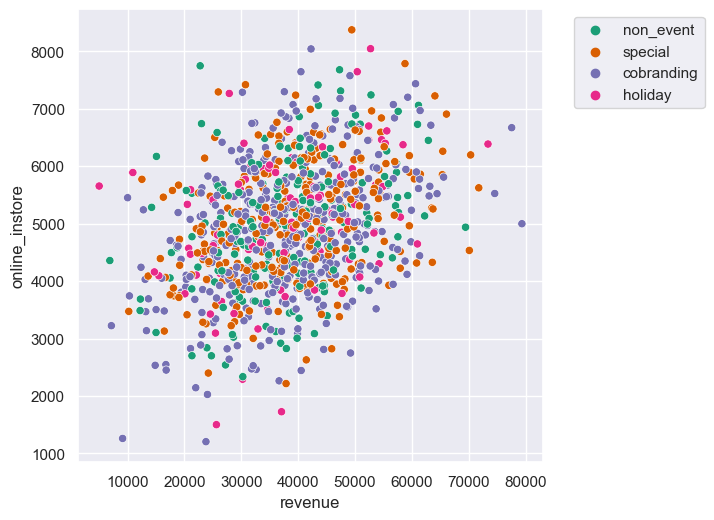

In [34]:
plt.figure(figsize=(6, 6), dpi = 100)
sns.scatterplot(x = 'revenue', y = 'online_instore', data=df, hue = 'event', palette = 'Dark2')
plt.legend(bbox_to_anchor=(1.05, 1))

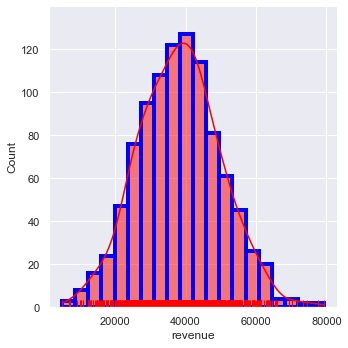

In [35]:
sns.set(style = 'darkgrid')
sns.displot(data=df, x='revenue', bins = 20, color = 'red', edgecolor = 'blue', linewidth = 4, kde = True, rug = True)

<AxesSubplot:xlabel='revenue', ylabel='Count'>

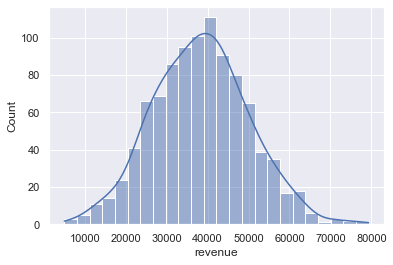

In [36]:
sns.histplot(data=df, x='revenue', kde = True)

<AxesSubplot:xlabel='revenue', ylabel='Density'>

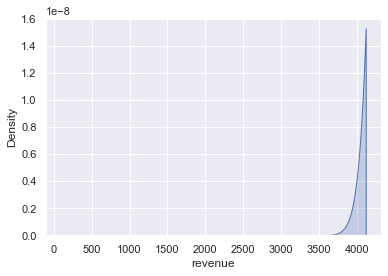

In [37]:
sns.kdeplot(data=df, x = 'revenue', clip=[0, 100], bw_adjust = 0.1, shade = True)

<AxesSubplot:xlabel='event', ylabel='count'>

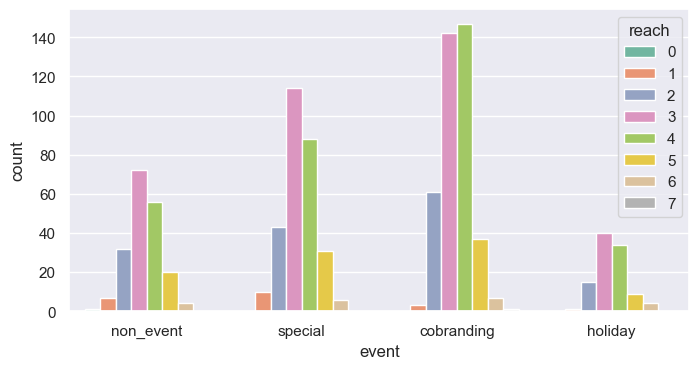

In [38]:
plt.figure(figsize=(8, 4), dpi=100)
sns.countplot(data=df, x='event', hue = 'reach', palette = 'Set2')

<AxesSubplot:xlabel='revenue', ylabel='online_instore'>

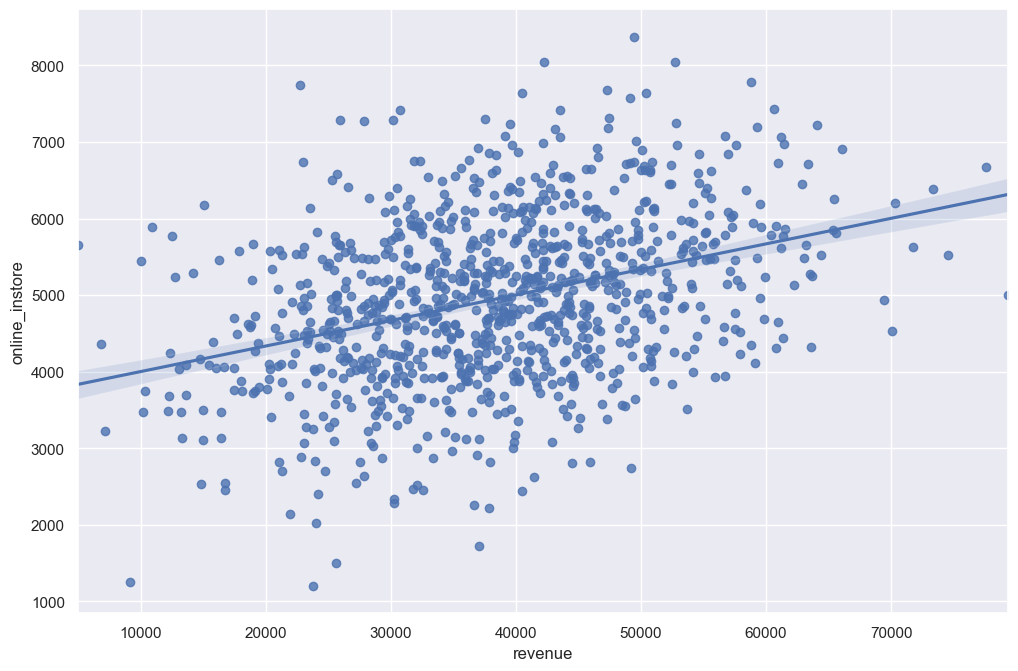

In [42]:
plt.figure(figsize=(12, 8), dpi=100)
sns.regplot(data=df, x = 'revenue', y = 'online_instore')

In [43]:
X = df['revenue']
y = df['online_instore']

In [44]:
np.polyfit(X, y, deg = 1)

array([3.33497585e-02, 3.66828183e+03])

In [72]:
potential_spend = np.linspace(0, 90000, 50000)

In [73]:
predicted_revenue = 3.33497585e-02*potential_spend + 3.66828183e+03

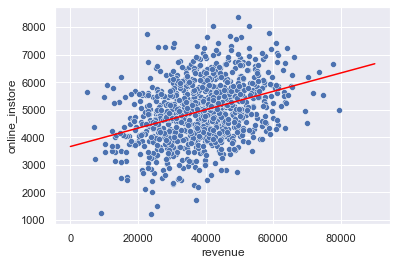

In [74]:
sns.scatterplot(x = 'revenue', y = 'online_instore', data=df)
plt.plot(potential_spend, predicted_revenue, color = 'red')

In [75]:
spend = 200
predicted_revenue = 3.33497585e-02*potential_spend + 3.66828183e+03

In [76]:
predicted_revenue

array([3668.28183   , 3668.34186077, 3668.40189153, ..., 6669.64003347,
       6669.70006423, 6669.760095  ])

In [77]:
np.polyfit(X, y, 3)

array([-8.54252733e-12,  9.40116621e-07,  2.54030335e-03,  3.95657050e+03])

In [78]:
pot_spend = np.linspace(0, 90000, 50000)

In [79]:
pred_rev = -8.54252733e-12*pot_spend**3 + 9.40116621e-07*pot_spend**2 + 2.54030335e-03*pot_spend + 3.95657050e+03

In [80]:
pred_rev

array([3956.5705    , 3956.57507568, 3956.57965746, ..., 5572.76895253,
       5572.70448471, 5572.64000803])

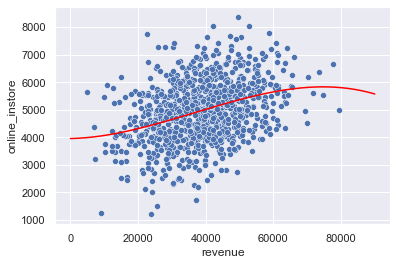

In [81]:
sns.scatterplot(x = 'revenue', y = 'online_instore', data=df)
plt.plot(pot_spend, pred_rev, color = 'red')

In [82]:
df.head()

,revenue,reach,online,instore,person,event,online_instore
0,45860.28,2,2115,3296,8,non_event,5411
1,63588.23,2,1826,2501,14,special,4327
2,23272.69,4,1851,2524,6,special,4375
3,45911.23,2,2437,3049,12,special,5486
4,36644.23,2,1122,1142,13,cobranding,2264


Text(0, 0.5, 'revenue')

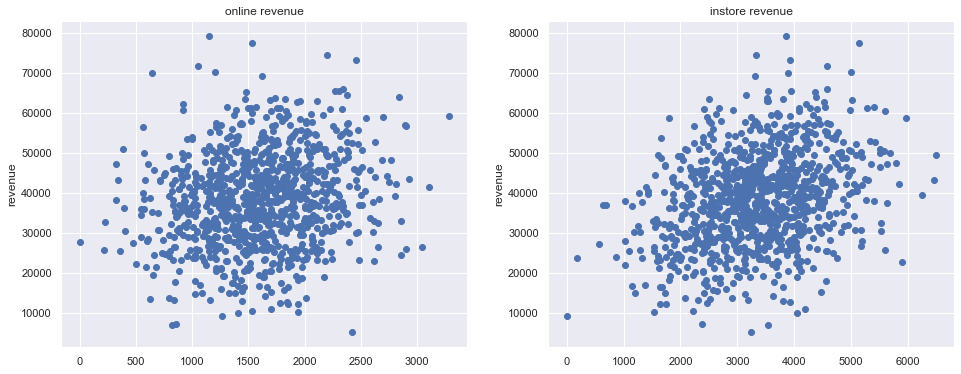

In [84]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))

axes[0].plot(df['online'],df['revenue'],'o')
axes[0].set_ylabel("revenue")
axes[0].set_title("online revenue")

axes[1].plot(df['instore'],df['revenue'],'o')
axes[1].set_title("instore revenue")
axes[1].set_ylabel("revenue")

In [86]:
df.drop('online_instore', axis = 1, inplace = True)

In [88]:
df.head()

,revenue,reach,online,instore,person,event
0,45860.28,2,2115,3296,8,non_event
1,63588.23,2,1826,2501,14,special
2,23272.69,4,1851,2524,6,special
3,45911.23,2,2437,3049,12,special
4,36644.23,2,1122,1142,13,cobranding


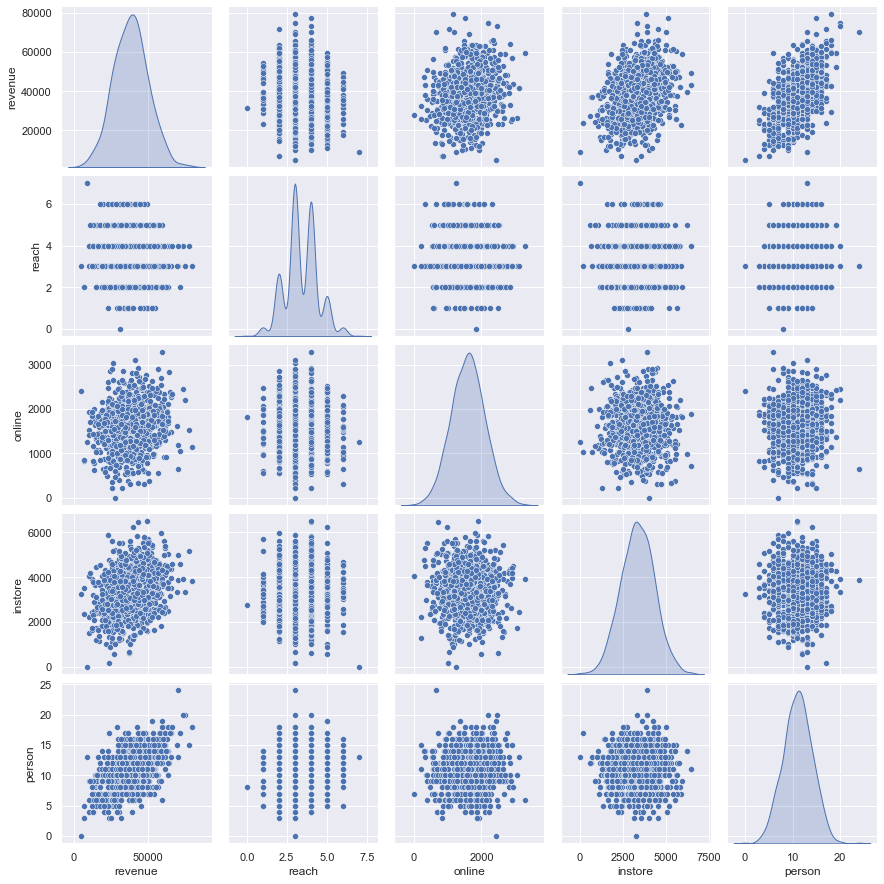

In [87]:
sns.pairplot(df, diag_kind = 'kde')

In [90]:
X = df[['online', 'instore', 'person', 'reach']]
X.head()

,online,instore,person,reach
0,2115,3296,8,2
1,1826,2501,14,2
2,1851,2524,6,4
3,2437,3049,12,2
4,1122,1142,13,2


In [91]:
y = df['revenue']
y.head()

0    45860.28
1    63588.23
2    23272.69
3    45911.23
4    36644.23
Name: revenue, dtype: float64

In [124]:
from sklearn.model_selection import train_test_split, cross_val_score

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [94]:
X_train

,online,instore,person,reach
652,2035,4490,11,2
434,1467,2455,8,3
659,1222,5533,9,3
288,1379,3454,15,2
452,1613,4344,13,3
...,...,...,...,...
575,1823,5963,9,2
838,858,3071,12,5
337,1820,5239,12,3
523,999,2170,10,4


In [95]:
len(df)

985

In [96]:
y_train

652    36616.53
434    29271.18
659    32363.56
288    50408.44
452    49517.17
         ...   
575    58782.94
838    34007.09
337    43560.74
523    39943.52
863    53317.69
Name: revenue, Length: 689, dtype: float64

In [97]:
len(X_test)

296

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
model = LinearRegression()

In [100]:
model.fit(X_train, y_train)

LinearRegression()

In [101]:
model.predict(X_test)

array([16595.87812631, 27885.16881516, 40495.91929937, 36844.89299084,
       45494.36794072, 33488.57027205, 16469.02444939, 37283.01140941,
       41503.58256008, 29975.50068365, 34967.13045812, 29317.28236917,
       44077.18035418, 34842.77907914, 34586.63912154, 37098.99840871,
       44508.39664743, 38109.20599248, 34683.43696715, 33311.61599231,
       46239.81979673, 38628.52493787, 32788.25277341, 46811.28739272,
       38397.07707581, 49625.64593174, 36038.92768747, 26165.79014205,
       34558.57215301, 41750.40238785, 37238.45599269, 25055.18533672,
       50454.1550186 , 37612.2854239 , 43371.76080028, 46077.16551311,
       43574.95670456, 33123.55088156, 30843.90470045, 19927.90226543,
       32601.65329974, 40153.70979527, 37800.80893708, 30881.57920109,
       25714.30313464, 39181.51114271, 43830.89373498, 37504.60916633,
       31202.37792178, 38508.91465801, 49942.005528  , 25734.68149539,
       29303.77217073, 33108.87282214, 41486.43974615, 27252.77203359,
      

In [102]:
test_predictions = model.predict(X_test)

In [103]:
test_predictions

array([16595.87812631, 27885.16881516, 40495.91929937, 36844.89299084,
       45494.36794072, 33488.57027205, 16469.02444939, 37283.01140941,
       41503.58256008, 29975.50068365, 34967.13045812, 29317.28236917,
       44077.18035418, 34842.77907914, 34586.63912154, 37098.99840871,
       44508.39664743, 38109.20599248, 34683.43696715, 33311.61599231,
       46239.81979673, 38628.52493787, 32788.25277341, 46811.28739272,
       38397.07707581, 49625.64593174, 36038.92768747, 26165.79014205,
       34558.57215301, 41750.40238785, 37238.45599269, 25055.18533672,
       50454.1550186 , 37612.2854239 , 43371.76080028, 46077.16551311,
       43574.95670456, 33123.55088156, 30843.90470045, 19927.90226543,
       32601.65329974, 40153.70979527, 37800.80893708, 30881.57920109,
       25714.30313464, 39181.51114271, 43830.89373498, 37504.60916633,
       31202.37792178, 38508.91465801, 49942.005528  , 25734.68149539,
       29303.77217073, 33108.87282214, 41486.43974615, 27252.77203359,
      

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [105]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [106]:
MAE

6999.58238460515

In [107]:
MSE

74047120.10420312

In [108]:
RMSE

8605.063631618486

In [109]:
df['revenue'].mean()

38357.355025380704

In [110]:
mean_squared_error(y_test, test_predictions)

74047120.10420312

In [111]:
np.sqrt(mean_squared_error(y_test, test_predictions))

8605.063631618486

In [113]:
test_residuals = y_test - test_predictions
test_residuals

682     4720.451874
857    11248.111185
100     3005.940701
109     1609.467009
471   -13669.687941
           ...     
522   -12464.100036
126    -3148.309556
227     9472.675883
148    20226.292025
841    -2217.530291
Name: revenue, Length: 296, dtype: float64

<AxesSubplot:xlabel='revenue', ylabel='revenue'>

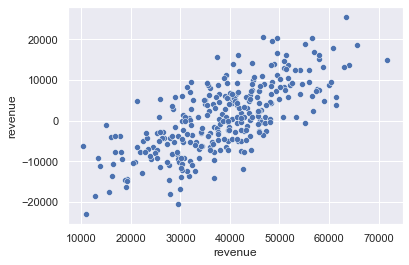

In [114]:
sns.scatterplot(x = y_test, y = test_residuals)

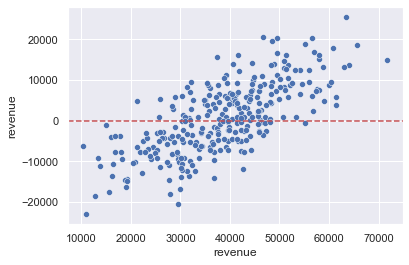

In [115]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'r', ls = '--')

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

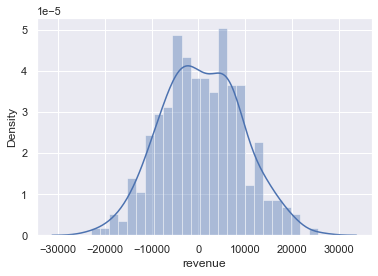

In [116]:
sns.distplot(test_residuals, bins=25, kde=True)

In [117]:
import scipy as sp

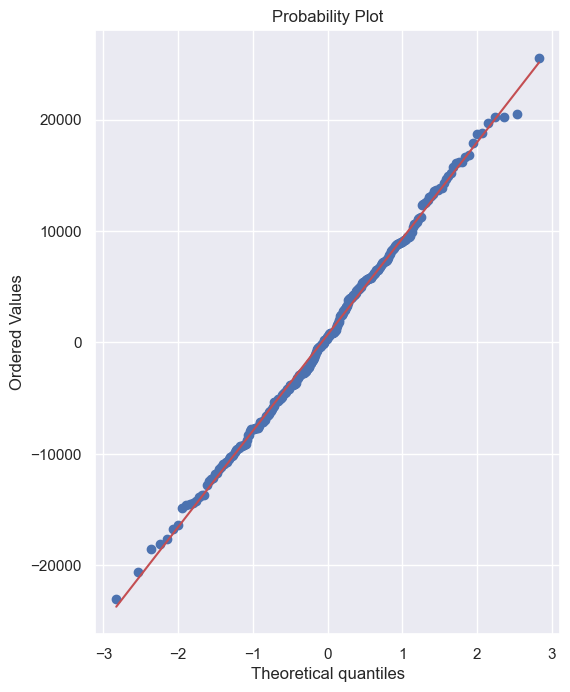

In [118]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)